In [ ]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-11-26 11:36:44--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.12.192, 104.18.13.192, 2606:4700::6812:cc0, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.12.192|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   234MB/s    in 0.3s    

2023-11-26 11:36:44 (234 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile,os

In [ ]:
file = '/tmp/messy_vs_clean_room.zip'
zip = zipfile.ZipFile(file, 'r')
zip.extractall('/tmp')
zip.close()

In [ ]:
base_dir = '/tmp/images'
traindir = os.path.join(base_dir, 'train')
valdir = os.path.join(base_dir,'val')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True, shear_range=0.2, fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(traindir, target_size=(150, 150), batch_size=4, class_mode='binary')

Found 192 images belonging to 2 classes.


In [ ]:
val_generator = test_datagen.flow_from_directory(valdir, target_size=(150, 150), batch_size=4, class_mode='binary')

Found 20 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.fit(train_generator, steps_per_epoch=25, epochs=20, validation_data=val_generator, validation_steps=5, verbose=2)

Epoch 1/20
25/25 - 27s - loss: 0.7945 - accuracy: 0.4800 - val_loss: 0.6934 - val_accuracy: 0.5000 - 27s/epoch - 1s/step
Epoch 2/20
25/25 - 15s - loss: 0.6923 - accuracy: 0.5500 - val_loss: 0.6930 - val_accuracy: 0.5000 - 15s/epoch - 605ms/step
Epoch 3/20
25/25 - 15s - loss: 0.6960 - accuracy: 0.4700 - val_loss: 0.6881 - val_accuracy: 0.6500 - 15s/epoch - 610ms/step
Epoch 4/20
25/25 - 15s - loss: 0.6897 - accuracy: 0.6500 - val_loss: 0.6482 - val_accuracy: 0.5000 - 15s/epoch - 609ms/step
Epoch 5/20
25/25 - 15s - loss: 0.6978 - accuracy: 0.4500 - val_loss: 0.6868 - val_accuracy: 0.8000 - 15s/epoch - 608ms/step
Epoch 6/20
25/25 - 17s - loss: 0.6890 - accuracy: 0.5300 - val_loss: 0.6893 - val_accuracy: 0.5000 - 17s/epoch - 663ms/step
Epoch 7/20
25/25 - 15s - loss: 0.6965 - accuracy: 0.5200 - val_loss: 0.6901 - val_accuracy: 0.5000 - 15s/epoch - 607ms/step
Epoch 8/20
25/25 - 15s - loss: 0.6935 - accuracy: 0.4800 - val_loss: 0.6848 - val_accuracy: 0.5000 - 15s/epoch - 611ms/step
Epoch 9/20


Saving m3.jpeg to m3.jpeg
1/1 [==============================] - 0s 152ms/step
m3.jpeg
your room is messy! so hurry clean it


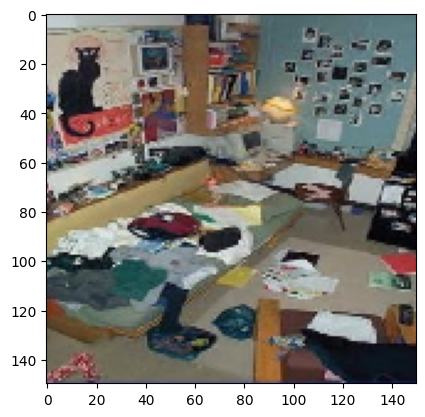

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes==0:
   print('your room is clean! good job')
  else:
   print('your room is messy! so hurry clean it')